<a href="https://colab.research.google.com/github/akash-habib/moral-and-behabioral-trends/blob/main/topic_selection_weekly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/data_lemma.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv(path)



Mounted at /content/drive


In [ ]:
df


,Date,Details,newspaper_name,lemmatized_tokens
0,2024-09-24,foreign affairs adviser touhid hossain met dep...,The Daily Star,"['foreign', 'af', 'advise', 'to', 'ho', 'met',..."
1,2024-09-24,dhaka court today placed inspector general pol...,The Daily Star,"['dh', 'court', 'to', 'place', 'inspect', 'gen..."
2,2024-09-24,foreign affairs adviser md touhid hossain exte...,The Daily Star,"['foreign', 'af', 'advise', 'm', 'to', 'ho', '..."
3,2024-09-24,bangladeshs army chief vowed countrys interim ...,The Daily Star,"['ban', 'arm', 'chief', 'vow', 'country', 'int..."
4,2024-09-24,nasir biswas 26yearold mason walking close mar...,The Daily Star,"['na', 'bi', '2', 'ma', 'walk', 'close', 'mart..."
...,...,...,...,...
127683,2024-06-30,দক্ষিণ আফ্রিকা সত্যিই চোকার ইতিহাসের প্রথম বিশ...,Jugantor,"['দক্ষিণ', 'আফ্রিকা', 'সত্যি', 'চো', 'ইতিহাস',..."
127684,2024-06-30,মো মতিউর রহমান কাজী আবু মাহমুদ ফয়সাল বৃন্তে ফু...,Jugantor,"['মো', 'মতি', 'রহমান', 'কাজ', 'আ', 'মাহমুদ', '..."
127685,2024-06-30,অজ্ঞাতনামা শক্তিশালী মহল হত্যার টিম মাঠে নেমেছ...,Jugantor,"['অ', 'শক্তি', 'মহল', 'হত্যা', 'টি', 'মাঠ', 'ন..."
127686,2024-06-30,পরিবেশ বন জলবায়ু পরিবর্তনমন্ত্রী সাবের হোসেন চ...,Jugantor,"['পরিবেশ', 'বন', 'জলবায়ু', 'পরিবর্তন', 'সাব', ..."


In [ ]:
df.drop('lemmatized_tokens',axis=1,inplace=True)
df

,Date,Details,newspaper_name
0,2024-09-24,foreign affairs adviser touhid hossain met dep...,The Daily Star
1,2024-09-24,dhaka court today placed inspector general pol...,The Daily Star
2,2024-09-24,foreign affairs adviser md touhid hossain exte...,The Daily Star
3,2024-09-24,bangladeshs army chief vowed countrys interim ...,The Daily Star
4,2024-09-24,nasir biswas 26yearold mason walking close mar...,The Daily Star
...,...,...,...
127683,2024-06-30,দক্ষিণ আফ্রিকা সত্যিই চোকার ইতিহাসের প্রথম বিশ...,Jugantor
127684,2024-06-30,মো মতিউর রহমান কাজী আবু মাহমুদ ফয়সাল বৃন্তে ফু...,Jugantor
127685,2024-06-30,অজ্ঞাতনামা শক্তিশালী মহল হত্যার টিম মাঠে নেমেছ...,Jugantor
127686,2024-06-30,পরিবেশ বন জলবায়ু পরিবর্তনমন্ত্রী সাবের হোসেন চ...,Jugantor


In [ ]:
import re
#df['Details'] = df['Details'].apply(lambda x: re.sub(r'['wwwthedailystarnet','latest']','', x))
df['Details'] = df['Details'].apply(lambda x: re.sub(r'wwwthedailystarnet', '', x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
!pip install langdetect
from langdetect import detect
import re
!apt-get install libicu-dev
!pip install polyglot
!pip install pycld2
!pip install morfessor
!pip install PyICU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=dae8f82881699b1f1b066309e68e0a09ff3471697e13111d96324a096f79468b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libicu-dev is already the newest version (70.1-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52562 sha256=8c64486e31897ce7edfec87d5d563709c9d24116d9cee2cf29dde381a8f57977
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f

In [ ]:
data=df


In [ ]:
import datetime
!pip install pyLDAvis
import sklearn
import pyLDAvis

In [ ]:
english_newspapers = ['The Daily Star', 'Bangladesh Post', 'The Business Standard']

df_english = df[df['newspaper_name'].isin(english_newspapers)]
df_bengali = df[~df['newspaper_name'].isin(english_newspapers)]

In [ ]:
df_english['Date'] = pd.to_datetime(df_english['Date'])

before = df_english[(df_english['Date'] >= '2024-08-12') & (df_english['Date'] <= '2024-08-18')]
after = df_english[(df_english['Date'] >= '2024-08-19') & (df_english['Date'] <= '2024-08-25')]


texts_before = before['Details'].tolist()
texts_after = after['Details'].tolist()


vectorizer_before = TfidfVectorizer()
X_before = vectorizer_before.fit_transform(texts_before)

#vectorizer_after = TfidfVectorizer()
#X_after = vectorizer_after.fit_transform(texts_after)


lda_before = LatentDirichletAllocation(n_components=15, random_state=42)
lda_before.fit(X_before)

#lda_after = LatentDirichletAllocation(n_components=15, random_state=42)
#lda_after.fit(X_after)


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


feature_names_before = vectorizer_before.get_feature_names_out()
#feature_names_after = vectorizer_after.get_feature_names_out()


print("Topics  2024-08-05:")
display_topics(lda_before, feature_names_before, 10)

#print("\n After 2024-08-05:")
#display_topics(lda_after, feature_names_after, 10)

<ipython-input-10-12c59f3a3a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Date'] = pd.to_datetime(df_english['Date'])


Topics  2024-08-05:
Topic 1:
saaf biman maj workers sri bail zia tongi
Topic 2:
ccc mansur administrators appoint corporations inflation martyrs parishads
Topic 3:
latif masnun coordinators mostak dengue cu touch rasel
Topic 4:
gatekeepers relations touhid railway bilateral indias relationship letters
Topic 5:
academic reopen educational generals ahnafs hamid mujib major
Topic 6:
mp uk motorcade refuge sajan banned sobahan amina
Topic 7:
schools primary natore denmark factory das yasin 201
Topic 8:
rights salman wasa market trains coast employee taqsem
Topic 9:
said police government bangladesh august case chief people
Topic 10:
feni quasem malaysia follow consular routine motorbike publication
Topic 11:
monir trains cadre commuter quaiyum secretaries energy uk
Topic 12:
joy mirza partys toll standing ramp expressway investigation
Topic 13:
service 45 fake dig retirement farooqeazam fighters allegation
Topic 14:
vc headquarters registrar joy chamber teachers circular transferred
Topic 

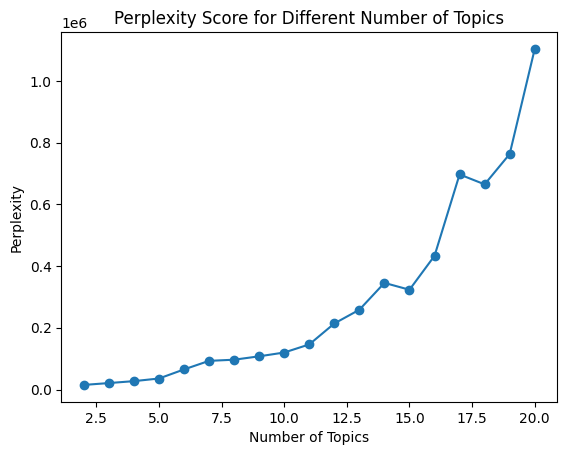

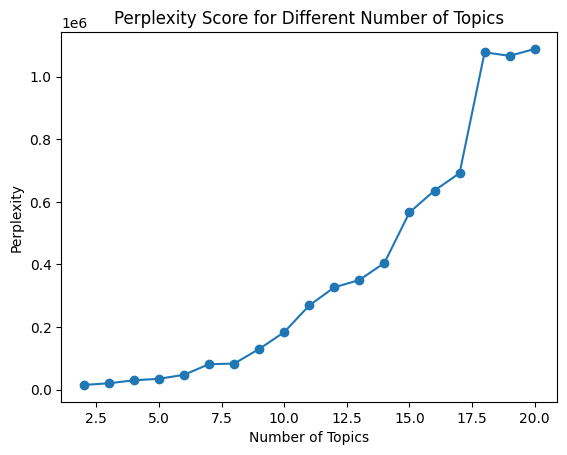

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

def find_optimal_components(texts, min_topics=2, max_topics=20):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    perplexities = []
    topic_range = range(min_topics, max_topics + 1)

    for n in topic_range:
        lda = LatentDirichletAllocation(n_components=n, random_state=42)
        lda.fit(X)
        perplexities.append(lda.perplexity(X))

    plt.plot(topic_range, perplexities, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.title('Perplexity Score for Different Number of Topics')
    plt.show()

# Example usage
find_optimal_components(texts_before)
find_optimal_components(texts_after)


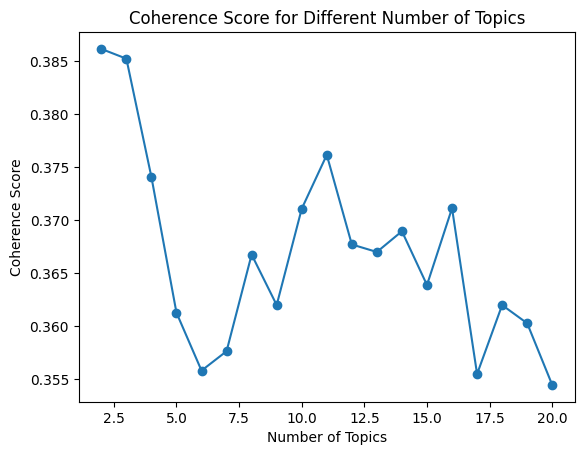

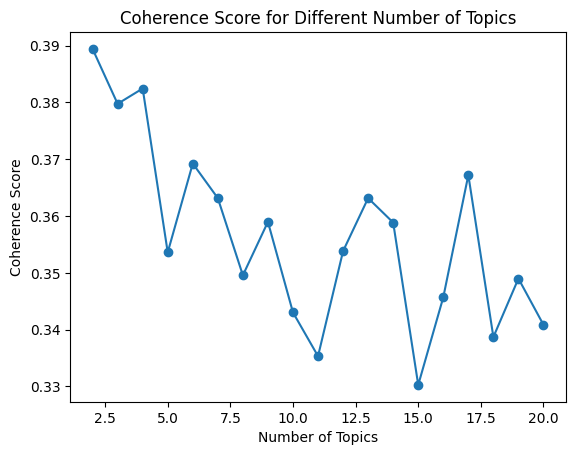

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

def coherence_score(texts, min_topics=2, max_topics=20):
    # Preprocessing
    tokenized_texts = [text.split() for text in texts]
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    coherence_scores = []
    topic_range = range(min_topics, max_topics + 1)

    for n in topic_range:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n, random_state=42)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model_lda.get_coherence())

    plt.plot(topic_range, coherence_scores, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Score for Different Number of Topics')
    plt.show()

# Example usage
coherence_score(texts_before)
coherence_score(texts_after)


In [ ]:
!pip install pyLDAvis
import sklearn
import pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.2 MB/s eta 0:00:00


In [ ]:
vocab_before = vectorizer_before.get_feature_names_out()
term_frequency_before = X_before.sum(axis=0).A1  # Sum of term frequencies for each term

vocab_after = vectorizer_after.get_feature_names_out()
term_frequency_after = X_after.sum(axis=0).A1  # Sum of term frequencies for each term

doc_topic_dists_before = lda_before.transform(X_before)  # This line is added

# Calculate doc_lengths (number of words in each document)
doc_lengths_before = [sum(row.toarray()[0]) for row in before['Details'].str.split().apply(vectorizer_before.transform)] # This line calculates doc_lengths

vis_before = pyLDAvis.prepare(topic_term_dists=lda_before.components_,
                              doc_topic_dists=doc_topic_dists_before,
                              doc_lengths=doc_lengths_before, # doc_lengths argument is provided
                              vocab=vocab_before,
                              term_frequency=term_frequency_before,
                              mds='tsne')
pyLDAvis.display(vis_before)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_top_words = 10  # Adjust as needed
for topic_idx, topic in enumerate(lda_before.components_):
    top_words_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = vocab_before[top_words_indices]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: saaf biman maj workers sri bail zia tongi summit khaleda
Topic 1: ccc mansur administrators appoint corporations inflation martyrs parishads zilla remove
Topic 2: latif masnun coordinators mostak dengue cu touch rasel parliamentary calm
Topic 3: gatekeepers relations touhid railway bilateral indias relationship letters countries future
Topic 4: academic reopen educational generals ahnafs hamid mujib major campuses airport
Topic 5: mp uk motorcade refuge sajan banned sobahan amina brur mihir
Topic 6: schools primary natore denmark factory das yasin 201 raihan shimul
Topic 7: rights salman wasa market trains coast employee taqsem resumed 999
Topic 8: said police government bangladesh august case chief people students secretary
Topic 9: feni quasem malaysia follow consular routine motorbike publication ammunition lala
Topic 10: monir trains cadre commuter quaiyum secretaries energy uk railway letter
Topic 11: joy mirza partys toll standing ramp expressway investigation interview 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_topic_dists_after = lda_after.transform(X_after)  # This line is added

# Calculate doc_lengths (number of words in each document)
doc_lengths_after = [sum(row.toarray()[0]) for row in after['Details'].str.split().apply(vectorizer_after.transform)] # This line calculates doc_lengths

vis_after = pyLDAvis.prepare(topic_term_dists=lda_after.components_,
                             doc_topic_dists=doc_topic_dists_after,
                             doc_lengths=doc_lengths_after, # doc_lengths argument is provided
                             vocab=vocab_after,
                             term_frequency=term_frequency_after,
                             mds='tsne')
pyLDAvis.display(vis_after)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
